<a href="https://colab.research.google.com/github/eireford/ConwayLifeTensorFlow/blob/master/ConWayLifeTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conway's Game Of Life on TensorFlow

[Conways Game of life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is an example of a problem that is ["Embarassingly Parralel"](https://en.wikipedia.org/wiki/Embarrassingly_parallel), each step in it's calculation only requires a limited logically proximal subset of data. Tensorflow facilitates running this operation in a distributed fashion.

In [5]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [6]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import time

In [7]:
def default_config():
  return { 
      'grid_shape':  [1000,1000],
      # for reproducability reuse seed
      'seed': 1000,
      'preferred_size_inches': 18
   }

In [8]:
def random_uniform_grid(shape,seed):
  return tf.round(tf.random.uniform(shape=shape,dtype=tf.float32, seed=seed))

Use the default configuration and generate a grid of cells, randomly alive or dead.

In [9]:
config = default_config()
grid_shape, seed, preferred_size_inches, = config.values()
grid = random_uniform_grid(grid_shape,seed)

Display the grid

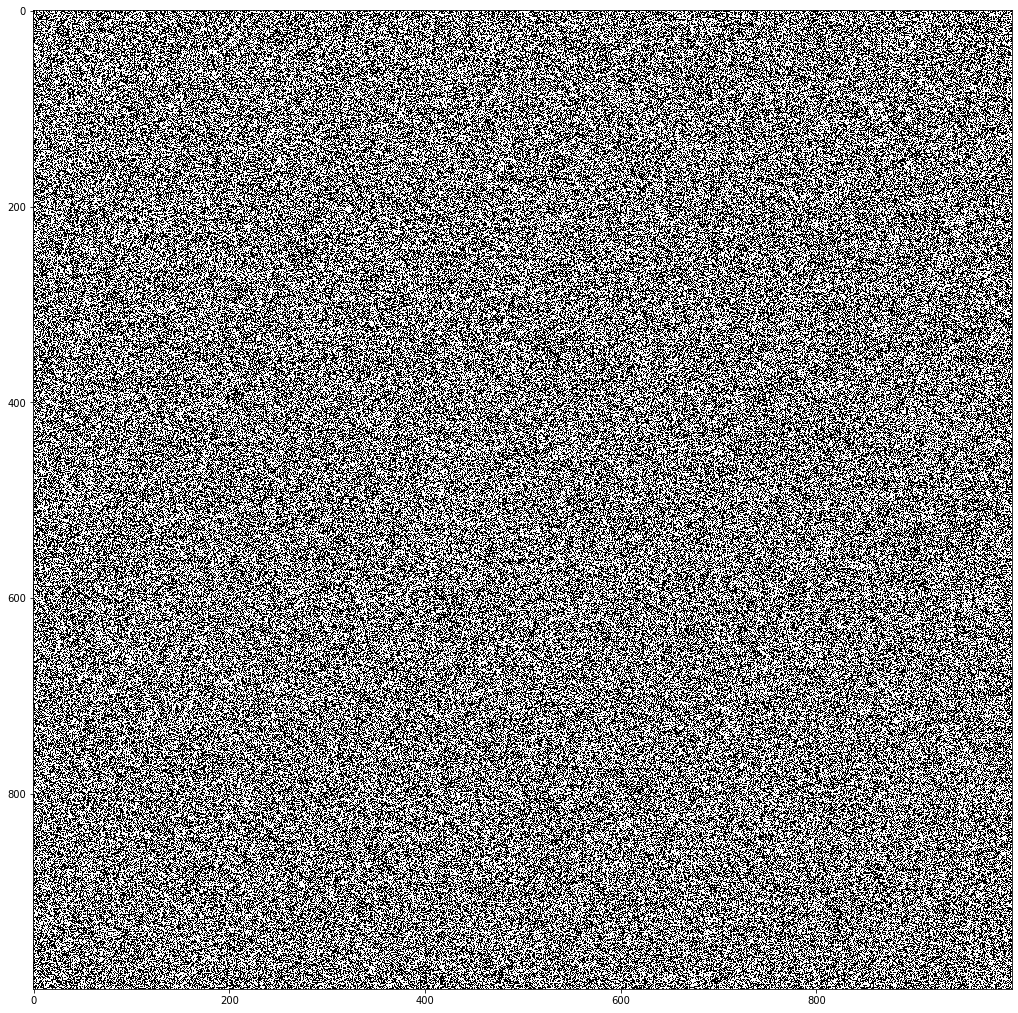

In [10]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
figure_1 = plt.imshow(grid,cmap='Greys',origin='upper',interpolation='nearest')

In [11]:
alive_total = tf.reduce_sum(grid)
ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
print("alive_total",int(alive_total))
print("alive_percent",float(ratio_alive*100))

alive_total 499547
alive_percent 49.9547004699707


In [12]:
livable_filter = tf.constant([
                                [1,1,1],
                                [1,10,1],
                                [1,1,1]
                                ],dtype=tf.float32,name='neighbors_filter')
def convolve_for_density(x):
  kernal = tf.reshape(livable_filter, [3,3,1,1], name='kernel')
  image = tf.reshape(x,[1,grid_shape[0],grid_shape[1],1], name='image')
  denisty_map = tf.reshape(tf.nn.conv2d(image,kernal,[1,1,1,1],"SAME"),grid_shape)
  return denisty_map  

In [13]:
def liveness_test(x):
  return tf.cast(tf.where(((x == 3)|(x == 12)|(x == 13)),1,0),dtype=tf.float32)

In [14]:
#running_state = convolve_for_density(grid)
#tf.print(running_state,summarize=-1)
#plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
#figure_2 = plt.imshow(tf.slice(running_state,(0,0),(grid_shape[0],grid_shape[1])),cmap='Greys',origin='upper',interpolation='nearest')

In [15]:
def population_report(x):
  alive_total = tf.reduce_sum(x)
  ratio_alive = alive_total/(grid_shape[0]*grid_shape[1])
  print("alive_total",int(alive_total))
  print("alive_percent",float(ratio_alive*100))

In [16]:
running_state = grid

0
alive_total 28849
alive_percent 2.8849000930786133
1000
alive_total 28829
alive_percent 2.8828999996185303
2000
alive_total 28845
alive_percent 2.884500026702881
3000
alive_total 28849
alive_percent 2.8849000930786133
4000
alive_total 28829
alive_percent 2.8828999996185303
5000
alive_total 28845
alive_percent 2.884500026702881
6000
alive_total 28849
alive_percent 2.8849000930786133
7000
alive_total 28829
alive_percent 2.8828999996185303
8000
alive_total 28845
alive_percent 2.884500026702881
9000
alive_total 28849
alive_percent 2.8849000930786133
10000
alive_total 28829
alive_percent 2.8828999996185303
11000
alive_total 28845
alive_percent 2.884500026702881
12000
alive_total 28849
alive_percent 2.8849000930786133
13000
alive_total 28829
alive_percent 2.8828999996185303
14000
alive_total 28845
alive_percent 2.884500026702881
15000
alive_total 28849
alive_percent 2.8849000930786133
16000
alive_total 28829
alive_percent 2.8828999996185303
17000
alive_total 28845
alive_percent 2.884500026

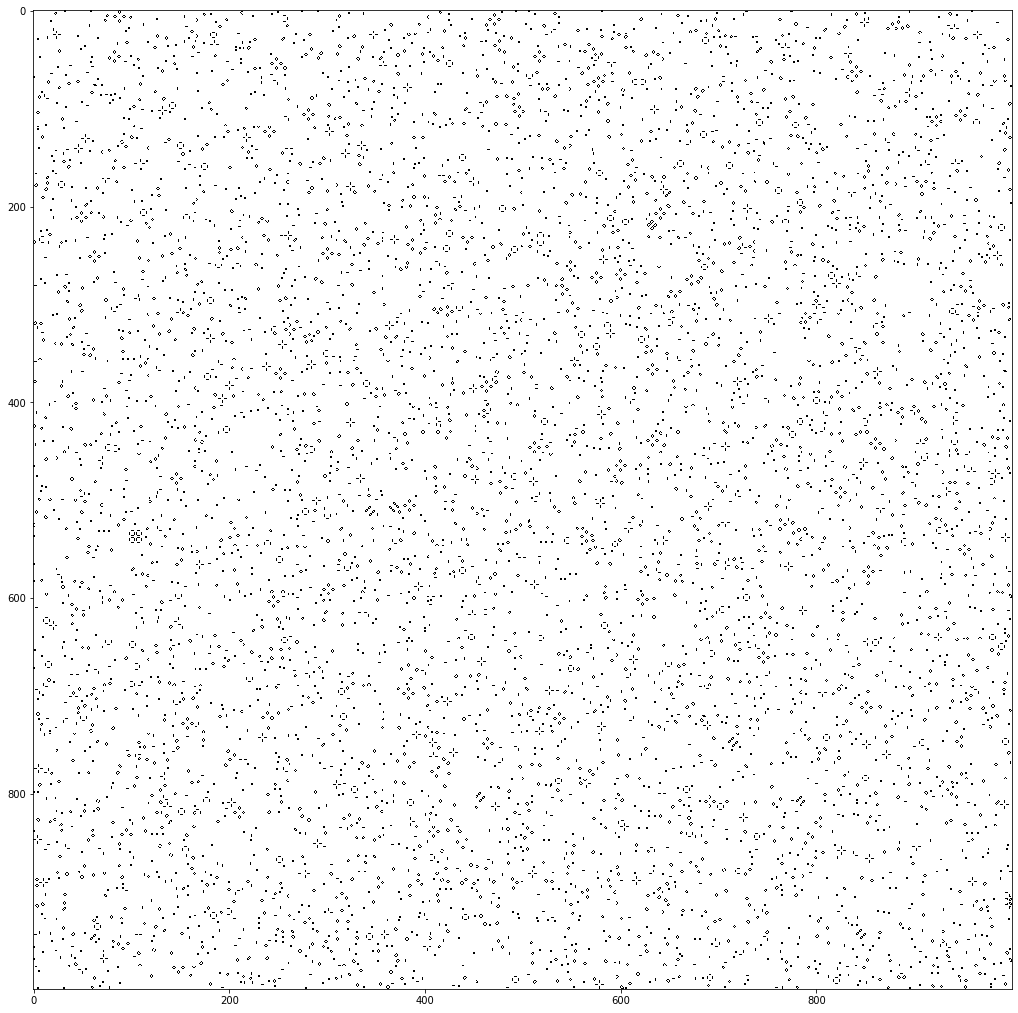

In [18]:
plt.gcf().set_size_inches(preferred_size_inches,preferred_size_inches)
for i in range(1_000_00):
  if i%1000 == 0:
    print(i)
    population_report(running_state)
  running_state = convolve_for_density(running_state)
  running_state = liveness_test(running_state)
figure_3 = plt.imshow(tf.slice(running_state,(0,0),(grid_shape[0],grid_shape[1])),cmap='Greys',origin='upper',interpolation='nearest')  

Credits
 - https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
 - https://nostarch.com/download/samples/PythonPlayground_sampleCh3.pdf
 - https://databricks.com/tensorflow/custom-functions
 - http://drsfenner.org/blog/2015/07/game-of-life-in-numpy-preliminaries-2/